In [1]:
import yaml

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from emodlib.malaria import *

In [2]:
from naive_infection import configure_from_file, run_challenge

In [3]:
configure_from_file('config.yaml')

{'Falciparum_MSP_Variants': 32,
 'Falciparum_Nonspecific_Types': 76,
 'Falciparum_PfEMP1_Variants': 1070,
 'Run_Number': 12345,
 'infection_params': {'Antibody_IRBC_Kill_Rate': 1.596,
  'Antigen_Switch_Rate': 7.645570124964182e-10,
  'Base_Gametocyte_Fraction_Male': 0.2,
  'Base_Gametocyte_Production_Rate': 0.06150582,
  'Base_Incubation_Period': 7,
  'Gametocyte_Stage_Survival_Rate': 0.588569307,
  'MSP1_Merozoite_Kill_Fraction': 0.511735322,
  'Merozoites_Per_Hepatocyte': 15000,
  'Merozoites_Per_Schizont': 16,
  'Nonspecific_Antigenicity_Factor': 0.415111634,
  'Number_Of_Asexual_Cycles_Without_Gametocytes': 1,
  'RBC_Destruction_Multiplier': 3.29},
 'susceptibility_params': {'Antibody_CSP_Decay_Days': 90,
  'Antibody_Capacity_Growth_Rate': 0.09,
  'Antibody_Memory_Level': 0.34,
  'Antibody_Stimulation_C50': 30,
  'Erythropoiesis_Anemia_Effect': 3.5,
  'Fever_IRBC_Kill_Rate': 1.4,
  'Maternal_Antibody_Decay_Rate': 0.01,
  'Max_MSP1_Antibody_Growthrate': 0.045,
  'Min_Adapted_Respons

In [4]:
df = run_challenge(duration=300)
print(df.head(10))

      parasite_density  gametocyte_density
days                                      
0             0.000000                 0.0
1             0.000000                 0.0
2             0.000000                 0.0
3             0.000000                 0.0
4             0.000000                 0.0
5             0.000000                 0.0
6             0.003000                 0.0
7             0.003000                 0.0
8             0.047676                 0.0
9             0.047676                 0.0


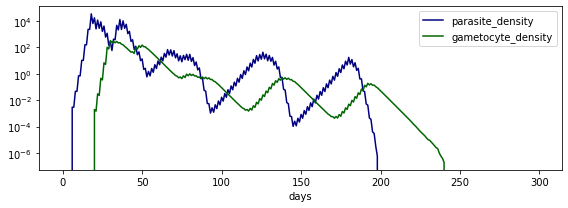

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
df.plot(ax=ax, color=dict(parasite_density='navy', gametocyte_density='darkgreen'))
ax.set(yscale='log')
fig.set_tight_layout(True)

In [6]:
n_people = 25
duration = 350
asexuals = np.zeros((n_people, duration))
pp = [IntrahostComponent.create() for _ in range(n_people)]
_ = [p.challenge() for p in pp]

In [7]:
for t in range(duration):
    for i, p in enumerate(pp):
        p.update(dt=1)
        asexuals[i, t] = p.parasite_density

In [8]:
df = pd.DataFrame(asexuals)
df.iloc[:5, :15]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,0.0,0.0,0.0,0.0,0.0,0.003,0.003,0.047676,0.047676,0.711076,0.711076,10.605539,10.605539,158.179199
1,0.0,0.0,0.0,0.0,0.0,0.0,0.003,0.003,0.047676,0.047676,0.711076,0.711076,10.605539,10.605539,158.179199
2,0.0,0.0,0.0,0.0,0.0,0.0,0.003,0.003,0.047676,0.047676,0.711076,0.711076,10.605539,10.605539,158.179199
3,0.0,0.0,0.0,0.0,0.0,0.0,0.003,0.003,0.047676,0.047676,0.711076,0.711076,10.605539,10.605539,158.179199
4,0.0,0.0,0.0,0.0,0.0,0.0,0.003,0.003,0.047676,0.047676,0.711076,0.711076,10.605539,10.605539,158.179199


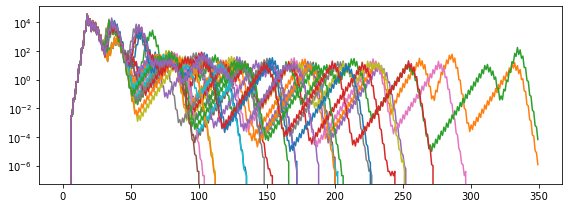

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(8,3))
df.T.plot(ax=ax, legend=False)
_ = ax.set(yscale='log')
fig.set_tight_layout(True)

In [10]:
def get_last_nonzero_by_row(A):
    """ https://stackoverflow.com/a/39959511 """
    return np.arange(A.shape[0]), A.shape[1] - 1 - (A[:, ::-1]!=0).argmax(1)

In [11]:
infection_durations = get_last_nonzero_by_row(df.values)[1]
infection_durations

array([135, 349, 166, 154, 252, 200, 296, 227, 251, 202, 172, 200, 349,
       244, 172, 100, 104, 148, 112, 135, 226, 112, 206, 272, 188])

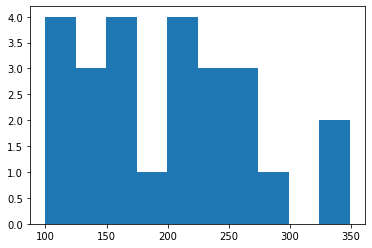

In [12]:
_ = plt.hist(infection_durations)